<a href="https://colab.research.google.com/github/Arvinth-s/Image-Enhancement-Techniques/blob/master/ECHO_histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#OM NAMO NARAYANA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


(720, 1280)
(360, 640)


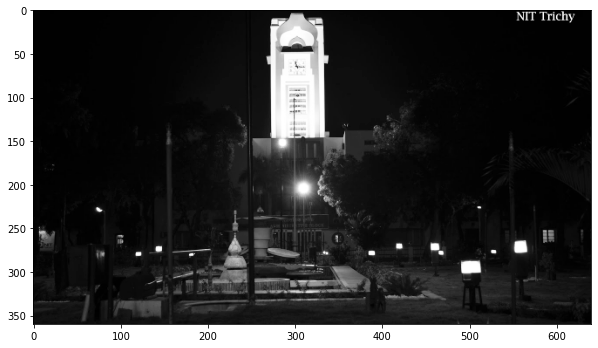

In [4]:
target_dir = '/content/drive/My Drive/ECHO-seminar/'
img = cv2.imread(target_dir + 'clocktower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ishape = img.shape
print(img.shape)
img=cv2.resize(img, (int(ishape[1]/2), int(ishape[0]/2)))
print(img.shape)
ishape = img.shape
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='Greys_r')

In [5]:
def hist_and_plot(img):
  hist,bins = np.histogram(img.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = cdf / cdf.max()
  # cdf_normalized = cdf * hist.max()/ cdf.max()
  fig, ax = plt.subplots(2,1)
  ax[0].plot(cdf_normalized, color = 'b')
  ax[1].hist(img.flatten(),256,[0,256], color = 'r')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')
  plt.show()
  return cdf_normalized

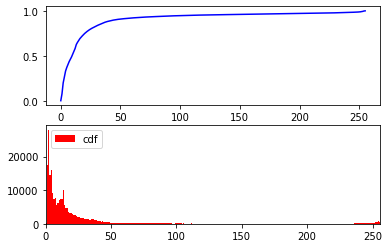

In [6]:
cdf_normalized = hist_and_plot(img)

In [7]:
X0 = 0
Xl = 255

In [8]:
def histf(x):
  return X0 + (Xl-X0)*cdf_normalized[x]

In [9]:
print(histf(1))

19.7525390625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


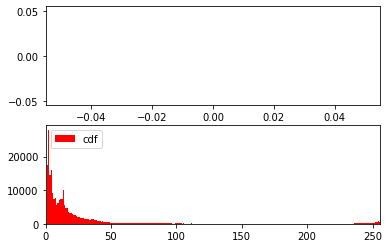

In [25]:
hist_img = np.array(list(map(histf, img.flatten())))
hist,bins = np.histogram(hist_img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()
cdf_normalized = cdf * hist.max()/ cdf.max()
# cdf_normalized = hist_and_plot(img)
fig, ax = plt.subplots(2,1)
ax[0].plot(cdf_normalized, color = 'b')
ax[1].hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

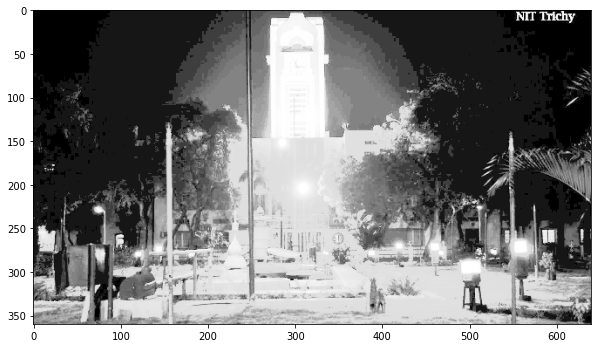

In [26]:
plt.figure(figsize=(10, 10))
img_ret_he = hist_img.reshape(ishape)
plt.imshow(img_ret_he, cmap='Greys_r')

23.649032118055555


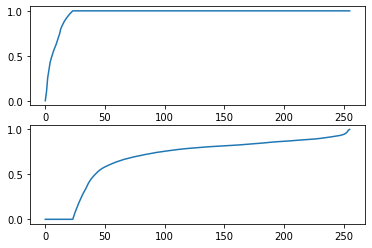

In [12]:
flat_img = img.flatten()
xmean = flat_img.mean()
print(xmean)
xu = [pxl for pxl in flat_img if pxl > xmean]
xl = [pxl for pxl in flat_img if pxl <= xmean]
hist,bins = np.histogram(xu,256,[0,256])
cdf = hist.cumsum()
cu = cdf / cdf.max()
hist,bins = np.histogram(xl,256,[0,256])
cdf = hist.cumsum()
cl = cdf / cdf.max()
fig, ax = plt.subplots(2, 1)
ax[0].plot(np.arange(cl.shape[0]), cl)
ax[1].plot(np.arange(cu.shape[0]), cu)

In [13]:
def bbhe_func(x):
  Xm = np.round(xmean)
  if(x<=xmean):
    return X0 + (Xm-X0)*cl[x]
  if(x>xmean):
    return (Xm+1 + (Xl - Xm+1)*cu[x])

In [14]:
bbhe_func(1)

2.3802876386511658

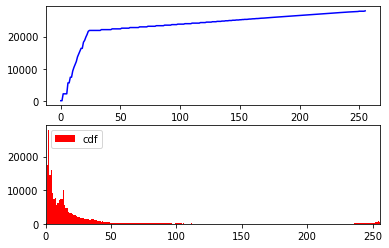

In [15]:
hist_img = np.array(list(map(bbhe_func, img.flatten())))
hist,bins = np.histogram(hist_img,256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()
cdf_normalized = cdf * hist.max()/ cdf.max()
# cdf_normalized = hist_and_plot(img)
fig, ax = plt.subplots(2,1)
ax[0].plot(cdf_normalized, color = 'b')
ax[1].hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

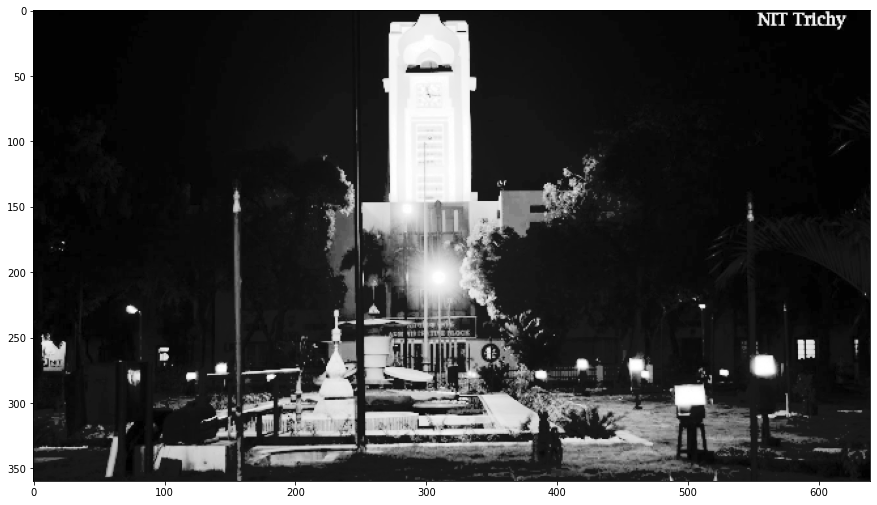

In [16]:
plt.figure(figsize=(15, 15))
img_ret = hist_img.reshape(ishape)
img_ret = img_ret/(img_ret.max())
plt.imshow(img_ret, cmap='Greys_r')

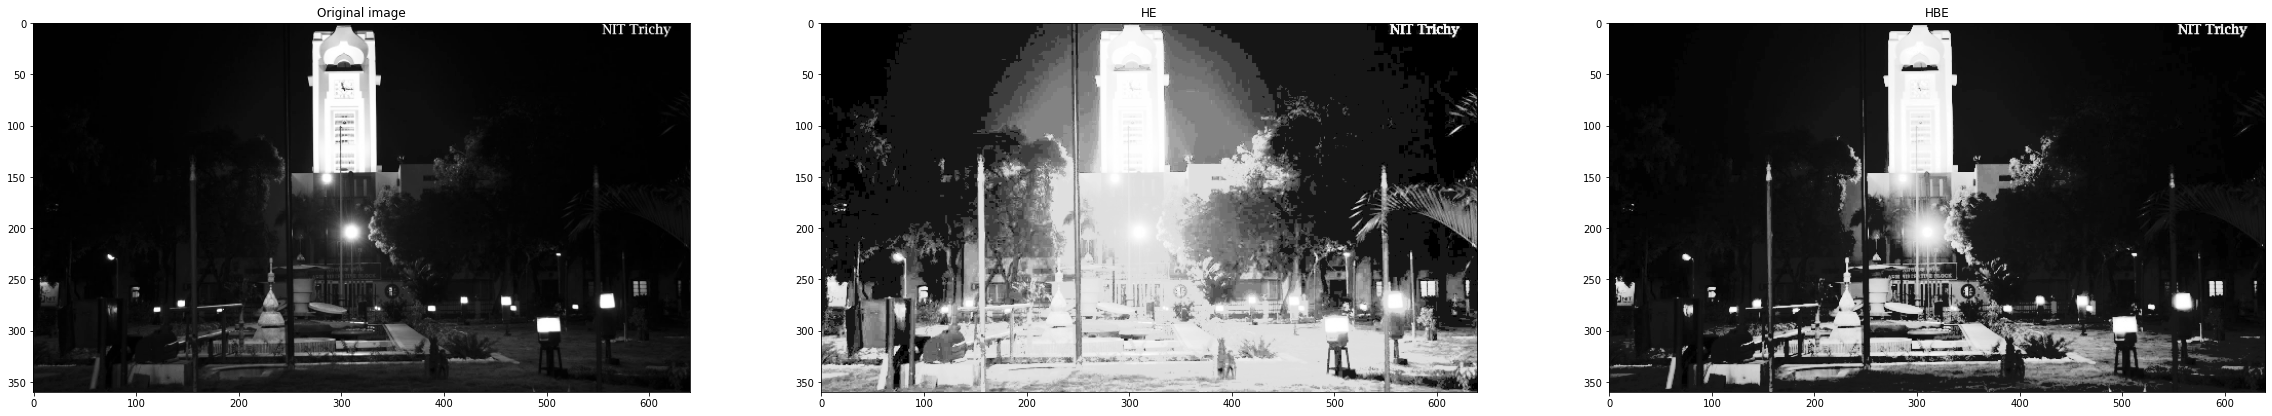

In [29]:
plt.figure(figsize=(40, 20))
plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(img, cmap='Greys_r')
plt.subplot(1, 3, 2)
plt.title('HE')
plt.imshow(img_ret_he, cmap='Greys_r')
plt.subplot(1, 3, 3)
plt.title('HBE')
plt.imshow(img_ret, cmap='Greys_r')

In [40]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
xmean = img.mean()
print(xmean)
L = img.max()
N = len(img.flatten())
print('N:', N)
print('hist[0]:', hist[0])
print('hist[L-1]:', hist[L-1])
print('L:', L)

23.649032118055555
N: 230400
hist[0]: 256
hist[L-1]: 946
L: 255


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


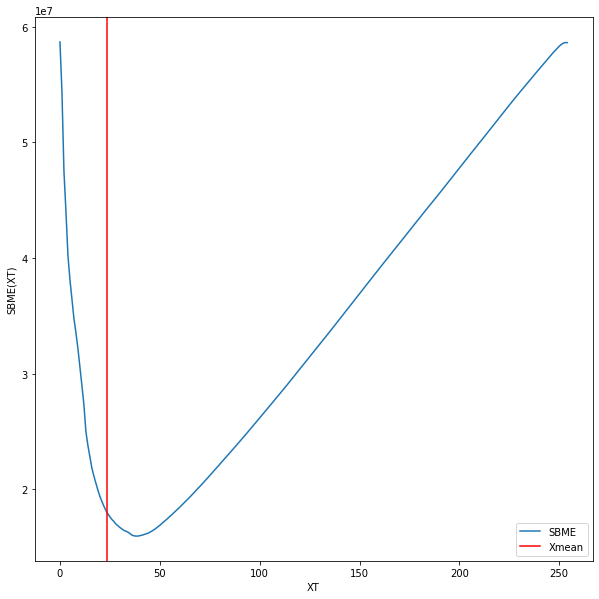

In [59]:
SBME = [L*(N - hist[0]) - 2 * xmean]
for i in range(1, L):
  sbme = SBME[i-1] + [N - L*hist[i]]
  SBME.append(sbme)
plt.figure(figsize=(10, 10))
plt.plot(np.arange(L), SBME)
plt.axvline(x=xmean, color='r')
plt.xlabel('XT')
plt.ylabel('SBME(XT)')
plt.legend(('SBME', 'Xmean'))